In [96]:
# Importing neccesary libraries for the project
import pandas as pd
import datetime as dt

In [97]:
# Reading the csv file & storing it as a Dataframe object with the variable name "online"
online = pd.read_csv('online.csv',parse_dates=True)

# Exploring the "online" dataframe

In [99]:
online.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID
0,572558,22745,6,2011-10-25 08:26:00,2.10,14286
1,577485,23196,1,2011-11-20 11:56:00,1.45,16360
2,560034,23299,6,2011-07-14 13:35:00,3.75,13933
3,578307,72349B,1,2011-11-23 15:53:00,2.10,17290
4,554656,21756,3,2011-05-25 13:36:00,5.95,17663


In [100]:
online.dtypes

InvoiceNo        int64
StockCode       object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
dtype: object

In [101]:
#Conversion of type of InvoiceDate column from 'object' to 'datetime' type for better date/time manipulations:
online.InvoiceDate =  pd.to_datetime(online.InvoiceDate)

In [102]:
#Confirming on the InvoiceDate column 'type' status:
online.InvoiceDate

0       2011-10-25 08:26:00
1       2011-11-20 11:56:00
2       2011-07-14 13:35:00
3       2011-11-23 15:53:00
4       2011-05-25 13:36:00
                ...        
70859   2011-11-08 12:32:00
70860   2010-12-09 11:30:00
70861   2011-07-14 16:45:00
70862   2011-05-22 13:51:00
70863   2011-08-24 14:53:00
Name: InvoiceDate, Length: 70864, dtype: datetime64[ns]

In [103]:
# Reconfirming the updated data types of each column:
online.dtypes

InvoiceNo               int64
StockCode              object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
dtype: object

In [104]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    70864 non-null  int64         
 1   StockCode    70864 non-null  object        
 2   Quantity     70864 non-null  int64         
 3   InvoiceDate  70864 non-null  datetime64[ns]
 4   UnitPrice    70864 non-null  float64       
 5   CustomerID   70864 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.2+ MB


# Creating new columns : Invoice month & Cohort month

In [105]:
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)

In [106]:
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)

In [107]:
grouping = online.groupby('CustomerID')['InvoiceMonth']

In [108]:
online['CohortMonth'] = grouping.transform('min')

In [109]:
type(online['CohortMonth'])

pandas.core.series.Series

In [110]:
online.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,CohortMonth
0,572558,22745,6,2011-10-25 08:26:00,2.10,14286,2011-10-01,2011-04-01
1,577485,23196,1,2011-11-20 11:56:00,1.45,16360,2011-11-01,2011-09-01
2,560034,23299,6,2011-07-14 13:35:00,3.75,13933,2011-07-01,2011-07-01
3,578307,72349B,1,2011-11-23 15:53:00,2.10,17290,2011-11-01,2011-11-01
4,554656,21756,3,2011-05-25 13:36:00,5.95,17663,2011-05-01,2011-02-01


# Extract integer values from data

In [111]:
# Defining function to extract year, month and day integer values.

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Assigning time offset value for 'Cohort Index' Calculation

In [112]:
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')

In [113]:
type(invoice_year)

pandas.core.series.Series

In [114]:
online.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,CohortMonth
0,572558,22745,6,2011-10-25 08:26:00,2.10,14286,2011-10-01,2011-04-01
1,577485,23196,1,2011-11-20 11:56:00,1.45,16360,2011-11-01,2011-09-01
2,560034,23299,6,2011-07-14 13:35:00,3.75,13933,2011-07-01,2011-07-01
3,578307,72349B,1,2011-11-23 15:53:00,2.10,17290,2011-11-01,2011-11-01
4,554656,21756,3,2011-05-25 13:36:00,5.95,17663,2011-05-01,2011-02-01


In [115]:
Cohort_Index = (invoice_year- cohort_year)*12 + (invoice_month - cohort_month) + 1

In [116]:
type(Cohort_Index)

pandas.core.series.Series

In [117]:
online['CohortIndex'] = Cohort_Index

In [118]:
online.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,CohortMonth,CohortIndex
0,572558,22745,6,2011-10-25 08:26:00,2.10,14286,2011-10-01,2011-04-01,7
1,577485,23196,1,2011-11-20 11:56:00,1.45,16360,2011-11-01,2011-09-01,3
2,560034,23299,6,2011-07-14 13:35:00,3.75,13933,2011-07-01,2011-07-01,1
3,578307,72349B,1,2011-11-23 15:53:00,2.10,17290,2011-11-01,2011-11-01,1
4,554656,21756,3,2011-05-25 13:36:00,5.95,17663,2011-05-01,2011-02-01,4


In [119]:
# Creating Cohort Data using CohortMonth, CohortIndex & CustomerID :
 
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
type(cohort_counts)

pandas.core.frame.DataFrame

# Calculating  Metric : Retention rate

In [121]:
cohort_sizes = cohort_counts.iloc[:,0]

In [122]:
retention = cohort_counts.divide(cohort_sizes, axis=0)
type(retention)

pandas.core.frame.DataFrame

In [123]:
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Other metrics : Average Quantity being sold for the given Cohort Window

In [124]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()

In [125]:
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cohort analysis visualization

In [126]:
# Using the same old cohort_counts built above, we shall be proceeding with the Visualization
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN


In [127]:
cohort_sizes = cohort_counts.iloc[:,0]
type(cohort_sizes)

pandas.core.series.Series

In [128]:
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.343575,0.308659,0.350559,0.342179,0.398045,0.347765,0.329609,0.335196,0.370112,0.354749,0.486034,0.240223
2011-01-01,1.0,0.207831,0.246988,0.243976,0.331325,0.271084,0.246988,0.259036,0.313253,0.307229,0.373494,0.135542,NaN
2011-02-01,1.0,0.183544,0.180380,0.262658,0.268987,0.234177,0.253165,0.262658,0.272152,0.300633,0.088608,NaN,NaN
2011-03-01,1.0,0.162371,0.257732,0.195876,0.213918,0.172680,0.252577,0.219072,0.275773,0.097938,NaN,NaN,NaN
2011-04-01,1.0,0.192157,0.203922,0.192157,0.184314,0.203922,0.219608,0.231373,0.066667,NaN,NaN,NaN,NaN


In [129]:
retention.index

DatetimeIndex(['2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01',
               '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01',
               '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01'],
              dtype='datetime64[ns]', name='CohortMonth', freq=None)

In [130]:
retention = retention.round(3) * 100

In [131]:
retention.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN


# Time for Visualization using seaborn

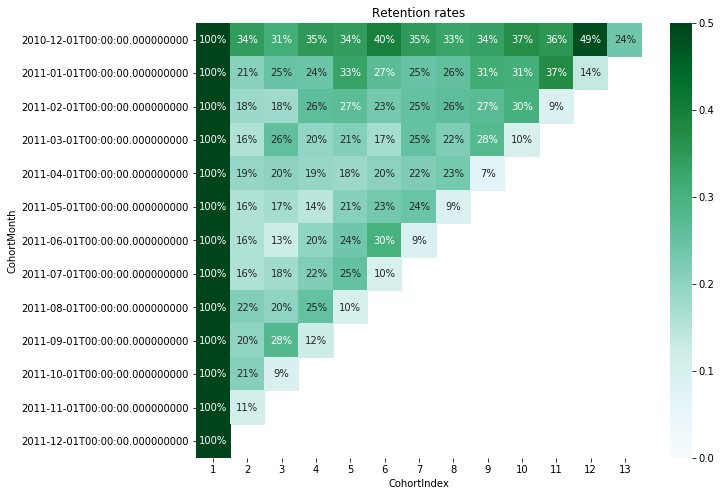

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title('Retention rates')

sns.heatmap(data = retention/100,annot = True,vmin = 0.0,fmt = '.0%',vmax = 0.5,cmap = 'BuGn')

plt.show()